In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Laliga.csv",skiprows=1)
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [4]:
df1=pd.read_csv('Golf.csv')
df1.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
df.replace({'-':np.nan},inplace=True)
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [6]:
df.drop('Pos',inplace=True,axis=1)
df.head()

,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [7]:
df.dtypes

Team             object
Seasons           int64
Points           object
GamesPlayed      object
GamesWon         object
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debut            object
Since/LastApp    object
BestPosition      int64
dtype: object

In [8]:
df['Points']=df['Points'].astype(float)
df['GamesPlayed']=df['GamesPlayed'].astype(float)
df['GamesWon']=df['GamesWon'].astype(float)

df.dtypes

Team              object
Seasons            int64
Points           float64
GamesPlayed      float64
GamesWon         float64
GamesDrawn        object
GamesLost         object
GoalsFor          object
GoalsAgainst      object
Champion          object
Runner-up         object
Third             object
Fourth            object
Fifth             object
Sixth             object
T                 object
Debut             object
Since/LastApp     object
BestPosition       int64
dtype: object

In [9]:
df['Since']=df['Since/LastApp'].apply(lambda x: x.split('-')[0])
df['Since']

0     1929
1     1929
2     2002
3     1987
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: Since, Length: 61, dtype: object

In [10]:
df['Debut_year']=df['Debut'].apply(lambda x: x.split('-')[0])
df['Debut_year']

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: Debut_year, Length: 61, dtype: object

### 1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

### Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:

#### 1. Which are the teams which started playing between 1930-1980?

In [11]:
df[(df['Debut']>='1930') & (df['Debut']<='1980')]['Team']

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

In [12]:
df[df['Debut'].between('1930','1980',inclusive=True)]['Team']

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object

#### 2. Which are the top 5 teams in terms of points?

In [13]:
df.sort_values(by='Points',ascending=False).head()[['Team','Points']]

,Team,Points
0,Real Madrid,4385.0
1,Barcelona,4262.0
2,Atletico Madrid,3442.0
3,Valencia,3386.0
4,Athletic Bilbao,3368.0


#### 3. What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [14]:
df['Winning_percentage']=(df['GamesWon']/df['GamesPlayed'])*100

df[['Team','Winning_percentage']]

,Team,Winning_percentage
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629
...,...,...
56,Xerez,21.052632
57,Condal,23.333333
58,Atletico Tetuan,23.333333
59,Cultural Leonesa,16.666667


In [15]:
df.sort_values(by='Winning_percentage',ascending=False).head()[['Team','Winning_percentage']]

,Team,Winning_percentage
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629


#### 4. Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [16]:
df['BestPosition'].dtype

dtype('int64')

In [17]:
df[df['BestPosition'].between(1,3,inclusive=True)][['Team','Winning_percentage']]

,Team,Winning_percentage
0,Real Madrid,59.630702
1,Barcelona,57.241130
2,Atletico Madrid,47.475134
3,Valencia,44.557057
4,Athletic Bilbao,43.772629
5,Sevilla,41.112957
6,Espanyol,36.100533
7,Real Sociedad,37.532580
8,Zaragoza,35.146022
9,Real Betis,35.069444


In [18]:
df[df['BestPosition'].between(4,7,inclusive=True)][['Team','Winning_percentage']]

,Team,Winning_percentage
11,Celta Vigo,34.511190
12,Valladolid,31.582538
15,Osasuna,32.321700
16,Malaga,31.075697
21,Granada,29.380054
23,Elche,29.941003
24,Getafe,32.236842
25,Hercules,29.299363
26,Tenerife,31.376518
28,Alaves,32.894737


### 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg  and the standard deviation was 25 mm Hg.

#### a) Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [19]:
mu=140
sigma=25
n=200
SE=sigma/(np.sqrt(n))
SE

1.7677669529663687

#### b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [20]:
# for 95% confidence interval, significance-level or alpha = 0.05 and cutoff point will be 1.96

In [21]:
z=np.abs(round((stats.norm.isf(q=0.025)),2))
print(z)
SE=25/(np.sqrt(200))
print(SE)

1.96
1.7677669529663687


In [22]:
print("Estimated range of mean is: ",(mu-1.96*SE, mu+1.96*SE))

Estimated range of mean is:  (136.5351767721859, 143.4648232278141)


In [23]:
print("Estimated range of mean is: ",stats.norm.interval(0.95,loc=mu,scale=SE))

Estimated range of mean is:  (136.5352404391258, 143.4647595608742)


#### c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. 
#### The sample mean and standard deviation estimates are the same as those in the original study. 
#### What is the estimated 95% confidence interval for the true mean blood pressure?

In [24]:
mu=140
sigma=25
n=100
SE=sigma/(np.sqrt(n))
SE

2.5

In [25]:
print("Estimated rangee of mean is: ",(mu-1.96*SE, mu+1.96*SE))

Estimated rangee of mean is:  (135.1, 144.9)


In [26]:
print("Estimated range of mean is: ",stats.norm.interval(0.95,loc=mu,scale=SE))

Estimated range of mean is:  (135.10009003864985, 144.89990996135015)


#### d) Which of the two above intervals are wider?

The second interval with sample size=100 is wider compared to first interval with sample size=200.
So, the sample with lower sample size is wider.

#### e) Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

### 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

### One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [28]:
df1.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [29]:
df1.shape

(40, 2)

#### 1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

In [30]:
# Both the columns in the golf dataset are continous variables. So, we will go with two-sample 't' test.

In [31]:
# Shapiro test

from scipy.stats import shapiro
shapiro(df1['Current']),shapiro(df1['New'])

((0.9707046747207642, 0.378787100315094),
 (0.9678263664245605, 0.3064655363559723))

In [32]:
# As p_value is greater than 0.05, the data is normal. So, we can go with parametric 

Null hypothesis(Ho)     : the driving distances of current and new golf balls are same.

Alternate hypothesis(Ha): the driving distances of current and new golf balls are different.

In [33]:
from scipy.stats import ttest_rel
ttest_rel(df1['Current'],df1['New'])

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

#### 2. Analyze the data to provide the hypothesis testing conclusion. 
#### What is the p-value for your test? 
#### What is your recommendation for Par Inc.?

In [34]:
from scipy.stats import ttest_rel
ttest_rel(df1['Current'],df1['New'])

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

Here p-value is 0.209 which is greater than the alpha(0.05). Hence we fail to reject the null hypothesis(Ho). This is significantly proving that the driving distcnces of current and new goals are same.

#### 3. What is the 95% confidence interval for the population mean of each model, and 
#### what is the 95% confidence interval for the difference between the means of the two population?

In [35]:
current_mean=np.mean(df1['Current'])
new_mean=np.mean(df1['New'])
current_std=np.std(df1['Current'],ddof=1)
new_std=np.std(df1['New'],ddof=1)

SE_current = current_std/(np.sqrt(len(df1['Current'])))
SE_new     = new_std/(np.sqrt(len(df1['New'])))

print("Estimated population mean for current golf balls with 95% confidence interval: ",stats.norm.interval(0.95,loc=current_mean,scale=current_std))

print("Estimated population mean for new golf balls with 95% confidence interval: ",stats.norm.interval(0.95,loc=new_mean,scale=new_std))

Estimated population mean for current golf balls with 95% confidence interval:  (253.11946495856103, 287.43053504143893)
Estimated population mean for new golf balls with 95% confidence interval:  (248.10242369418842, 286.8975763058116)


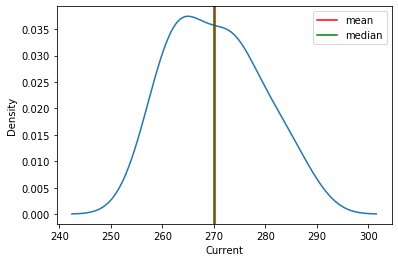

In [42]:
sns.kdeplot(df1['Current'])
plt.axvline(current_mean,color='r',label='mean')
plt.axvline(np.median(df1['Current']),color='g',label='median')
plt.legend()
plt.show()

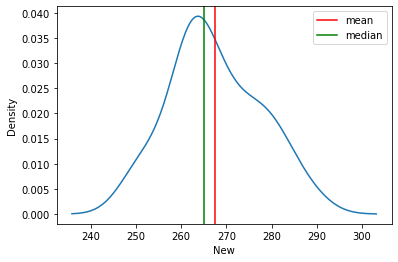

In [43]:
sns.kdeplot(df1['New'])
plt.axvline(new_mean,color='r',label='mean')
plt.axvline(np.median(df1['New']),color='g',label='median')
plt.legend()
plt.show()

In [44]:
diff=df1['Current']-df1['New']
mean_diff=np.mean(diff)
std_diff=np.std(diff,ddof=1)
SE_diff=std_diff/(np.sqrt(len(diff)))

print("95% confidence interval for the difference between the means of two population:",stats.norm.interval(0.95,loc=mean_diff,scale=std_diff))

95% confidence interval for the difference between the means of two population: (-24.16269215914952, 29.712692159149515)


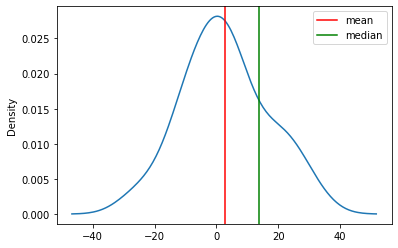

In [45]:
sns.kdeplot(df1['Current']-df1['New'])
plt.axvline(mean_diff,color='r',label='mean')
plt.axvline(std_diff,color='g',label='median')
plt.legend()
plt.show()